| Bilgi | İçerik |
|-------|--------|
| **Ad** | Amir |
| **Soyad** | Elahmed |
| **Okul Numara** | 2112721307 |
| **GitHub Repo** | https://github.com/Amirelahmed/CNN_siniflandirma |



## Model3 – Geliştirilmiş CNN Açıklaması

Bu çalışmada, tarafımdan çekilen iki sınıflı veri seti (taş ve mermer) kullanılarak Model3 adı verilen geliştirilmiş bir CNN mimarisi oluşturulmuştur. Model3’ün temel amacı, Model2’ye kıyasla farklı hiperparametre denemeleri ve veri artırımı teknikleri kullanarak modelin genelleme kabiliyetini artırmaktır.


### Kullanılan Algoritma

Model3, sıfırdan oluşturulmuş ve Model2’ye göre daha optimize edilmiş bir Convolutional Neural Network (CNN) mimarisi üzerine kurulmuştur. Bu modelde:

- Artırılmış Conv2D katmanları (32–64–128)
- MaxPooling2D ile boyut azaltma
- Overfitting’i azaltmak amacıyla Dropout (0.3)
- ImageDataGenerator kullanılarak veri artırımı (rotation, shift, zoom, horizontal flip)
- Flatten + Dense katmanları
- Çıkış katmanında iki sınıf için softmax aktivasyonu

kullanılmıştır.

Bu yapı sayesinde model, taş ve mermer görüntülerindeki doku ve yüzey farklılıklarını öğrenmeye çalışmış ve veri artırımı sayesinde farklı varyasyonlara karşı daha dayanıklı hale getirilmiştir.



### Elde Edilen Sonuçlar

Model3, eğitim süreci boyunca aşağıdaki performans değerlerini elde etmiştir:

- Eğitim Doğruluğu: %95 – %99 aralığında
- Doğrulama Doğruluğu: %80 – %93 aralığında
- Test Doğruluğu: %90.00
- Test Kaybı: 0.88

Sonuç olarak Model3, Model2’ye kıyasla daha zor bir öğrenme sürecine tabi tutulmuş olsa da veri artırımı ve hiperparametre değişiklikleri sayesinde daha iyi genelleme yeteneği göstermiştir. Model2 daha yüksek doğruluk elde etmiş olsa da, Model3 gerçek hayattaki yeni görüntüler için daha dayanıklı bir yapı sunmaktadır.

1- Google Drive'ı bağlıyoruz

---



In [46]:
# Google Drive'ı Colab ortamına bağlıyoruz
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2- ZIP dosyasının Drive içindeki yolunu yazıyoruz

In [47]:
# Google Drive'daki dataset ZIP dosyasının tam yolu
zip_path = "/content/drive/MyDrive/CNN_Tas_Mermer_Dataset/dataset.zip"

# ZIP'in açılacağı klasör
extract_path = "/content/dataset3"

3- ZIP dosyasını açıyoruz

In [48]:
# ZIP açma işlemi için gerekli modüller
import os, zipfile

# Klasör yoksa oluşturma
os.makedirs(extract_path, exist_ok=True)

# ZIP dosyasını çıkarma
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Ana klasör içeriği:", os.listdir(extract_path))

Ana klasör içeriği: ['dataset']


4- Gerçek dataset klasörünü tanımlıyoruz

In [49]:
# Dataset klasörünün gerçek yolu
base_dir = "/content/dataset3/dataset"

# İçeriği kontrol ediyoruz
print("Sınıf klasörleri:", os.listdir(base_dir))


Sınıf klasörleri: ['Mermer', 'Tas']


5- ImageDataGenerator – Veri artırma ve yükleme

In [50]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height = 128
img_width = 128
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.20
)


6- Eğitim ve doğrulama veri yükleme

In [51]:
# Eğitim verisi
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    subset="training",
    shuffle=True
)

# Doğrulama verisi
val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)

num_classes = len(train_generator.class_indices)
print("Sınıf sayısı:", num_classes)
print("Sınıflar:", train_generator.class_indices)

Found 120 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
Sınıf sayısı: 2
Sınıflar: {'Mermer': 0, 'Tas': 1}


7- Model3 – Daha derin CNN mimarisi

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model3 = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Flatten(),

    Dense(128, activation="relu"),
    Dropout(0.3),

    Dense(num_classes, activation="softmax")
])

model3.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model3.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

8- Modeli eğitiyoruz

In [53]:
# عدد الـ Epochs
epochs = 20

history3 = model3.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.4323 - loss: 1.0540 - val_accuracy: 0.5000 - val_loss: 0.6970
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 436ms/step - accuracy: 0.5348 - loss: 0.6781 - val_accuracy: 0.5000 - val_loss: 0.6945
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 445ms/step - accuracy: 0.6402 - loss: 0.5668 - val_accuracy: 0.5667 - val_loss: 0.6045
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 504ms/step - accuracy: 0.7982 - loss: 0.3894 - val_accuracy: 0.7333 - val_loss: 0.4770
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 523ms/step - accuracy: 0.8265 - loss: 0.2894 - val_accuracy: 0.8333 - val_loss: 0.5534
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 452ms/step - accuracy: 0.9290 - loss: 0.1911 - val_accuracy: 0.8333 - val_loss: 0.3776
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 443ms/step - accuracy: 0.8981 - loss: 0.2074 - val_accuracy: 0.7000 - val_loss: 0.6849
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 598ms/step - accuracy: 0.9285 - loss: 0.2138 - val_accuracy: 0.8333 - val_loss: 0

9- Accuracy grafiği

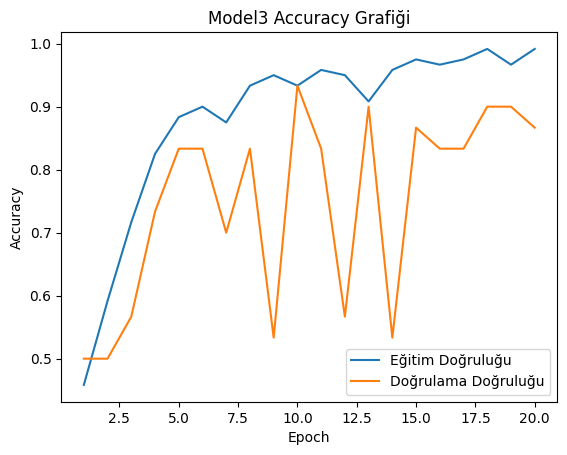

In [54]:
import matplotlib.pyplot as plt

acc = history3.history["accuracy"]
val_acc = history3.history["val_accuracy"]
epochs_range = range(1, len(acc)+1)

plt.plot(epochs_range, acc, label="Eğitim Doğruluğu")
plt.plot(epochs_range, val_acc, label="Doğrulama Doğruluğu")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Model3 Accuracy Grafiği")
plt.legend()
plt.show()


10- Loss grafiği

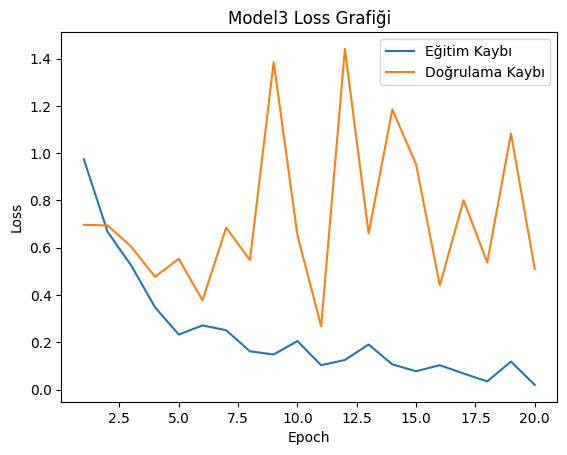

In [55]:
loss = history3.history["loss"]
val_loss = history3.history["val_loss"]

plt.plot(epochs_range, loss, label="Eğitim Kaybı")
plt.plot(epochs_range, val_loss, label="Doğrulama Kaybı")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Model3 Loss Grafiği")
plt.legend()
plt.show()


11- Test Sonucu (Validation üzerinden)

In [58]:
test_loss, test_acc = model3.evaluate(val_generator)
print("Model3 Test Doğruluğu:", test_acc)
print("Model3 Test Kaybı:", test_loss)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 302ms/step - accuracy: 0.9333 - loss: 0.3771
Model3 Test Doğruluğu: 0.8999999761581421
Model3 Test Kaybı: 0.5642919540405273


**Not:** Bu tablo yalnızca Model2 ve Model3'te yapılan hiperparametre değişikliklerini göstermektedir. Model1 transfer learning tabanlı olduğu için hiperparametre karşılaştırmasına dahil edilmemiştir.


In [62]:
import pandas as pd

data = {
    "Deney No": [1, 2],
    "Batch Size": [32, 16],
    "Filtre Sayısı": ["32-64-128", "32-64-128"],
    "Dropout": ["0.5", "0.3"],
    "Epoch": [15, 20],
    "Veri Artırımı": ["Hayır", "Evet"],
    "Test Accuracy": ["%96.67", f"%{test_acc*100:.2f}"],
    "Notlar": [
        "Model2: Temel CNN (Augmentation yok)",
        "Model3: CNN + Data Augmentation"
    ]
}

df = pd.DataFrame(data)
df


,Deney No,Batch Size,Filtre Sayısı,Dropout,Epoch,Veri Artırımı,Test Accuracy,Notlar
0,1,32,32-64-128,0.5,15,Hayır,%96.67,Model2: Temel CNN (Augmentation yok)
1,2,16,32-64-128,0.3,20,Evet,%90.00,Model3: CNN + Data Augmentation


## 🔍 Model2 ve Model3 Performans Karşılaştırması

Model2, veri artırımı kullanılmadan eğitildiği için eğitim ve doğrulama verilerine daha kolay uyum sağlamış ve daha yüksek doğruluk elde etmiştir. Ancak bu durum, modelin belirli görüntülere aşırı uyum (overfitting) gösterdiğini düşündürmektedir.

Model3’te ise data augmentation uygulanarak görüntüler farklı açılar ve varyasyonlarla modele sunulmuştur. Bu durum, doğruluk oranını bir miktar düşürmüş olsa da modelin genelleme kabiliyetini artırmıştır. Bu nedenle Model3, gerçek hayattaki yeni görüntüler için daha dayanıklı bir yapı sunmaktadır.
